In [92]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [273]:
N = 1000
turns = np.arange(N)*1/(frev)
T = turns[1] - turns[0]  # sampling interval = 1
fs = 1 / T  # sampling frequency
frev = 43.45e3
#fs = fs*frev*2 # The factor of 2 is needed as we take only half of the sample for the periodogram function

In [274]:
phi_0 = 1e-8  # amplitude of noise, aka stdPhaseNoise 
Delta_psi = 0.18 # the peak of the spectrum

psi_t_list = []
psi_t = 0

# parameters for ksi
mean = 0.0
std = 0.04
for i in turns:
    psi_t_list.append(psi_t)
    ksi = np.random.normal(mean, std)  # different seed on each turn
    psi_t = psi_t + 2 * np.pi * Delta_psi + 2 * np.pi * ksi

# Construct the noise signal
y = phi_0 * np.cos(psi_t_list)

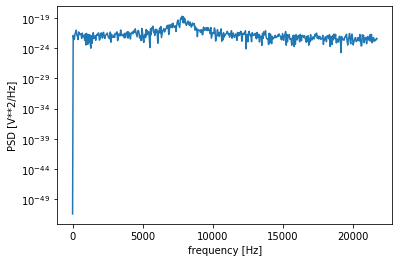

In [275]:
f, Pxx_den = signal.periodogram(y, fs)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [276]:
np.mean(Pxx_den)

2.2852921511468117e-21

In [277]:
1e-8**2


1.0000000000000001e-16

In [278]:
print('The total noise power as obtained from signal processing is {}'.format(np.mean(Pxx_den*frev)))

The total noise power as obtained from signal processing is 9.929594396732897e-17


In [279]:
print('The PSD at vb {} A.U^2/Hz'.format(np.max(PSD_vb)))

The PSD at vb 4.711662931366446e-19 A.U^2/Hz


In [280]:
# confirm that is indeed at vb
index = np.argmax(Pxx_den)

In [281]:
0.18*frev

7821.0

In [249]:
to maximum den einai sto vb

SyntaxError: invalid syntax (<ipython-input-249-4815e317559c>, line 1)